In [1]:
import pandas as pd 
import pyarma as pa 
import numpy as np 
import glob 
import matplotlib.pyplot as plt

## Problem 2

In [16]:
def u(x):
    u = 1 - (1 -np.exp(-10) )*x - np.exp(-10*x)
    return u 

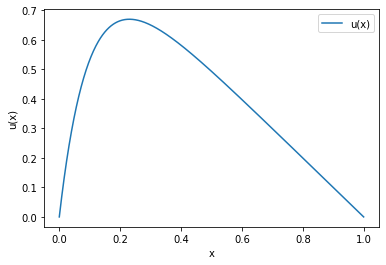

In [28]:
plot = pd.read_csv("Data/prob_2_data.csv").plot(x='x',y='u(x)')
plt.ylabel('u(x)')
plot.get_figure().savefig('Figures/problem_2.pdf')



## Problem 7 

In [29]:
prob7_files = glob.glob('Data/prob7*.csv')

x = np.linspace(0,1,1000000)
u_ = u(x)

len_list = []
plt.figure(figsize=(16,8))
plt.xlabel('x')
plt.ylabel('v(x)')
for file in prob7_files:
    df = pd.read_csv(file)
    plt.plot(df['x'],df['v(x)'],label=f'v(x) - n:{df.shape[0]}')
    
    len_list.append(df.shape[0])
# plt.legend([f'v(x) - n:{l}' for l in len_list])
plt.plot(x,u_,label='u(x)')
plt.legend()
plt.savefig('Figures/problem7.pdf')

## Problem 8

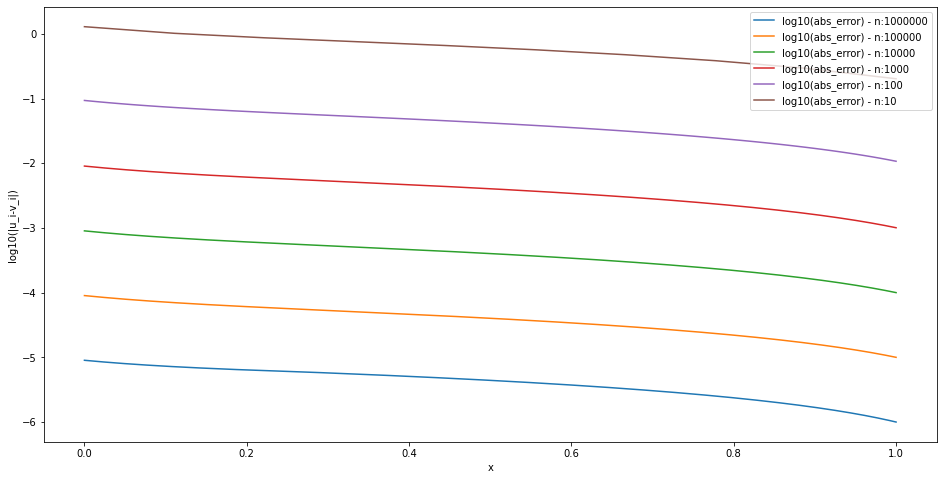

In [171]:
plt.figure(figsize=(16,8))
plt.xlabel('x')
plt.ylabel('log10(|u_i-v_i|)')
for file in glob.glob('Data/prob7*.csv'):
    df = pd.read_csv(file)
    df['u(x)'] = u(df['x'])
    df['abs_err'] = np.log10(np.absolute(
                                        (df['u(x)'] - df['v(x)']) 
                                        ) 
                            ) 
    plt.plot(df['x'],df['abs_err'],label=f'log10(abs_error) - n:{df.shape[0]}')
plt.legend()
plt.savefig('Figures/problem8_abs_error.pdf')

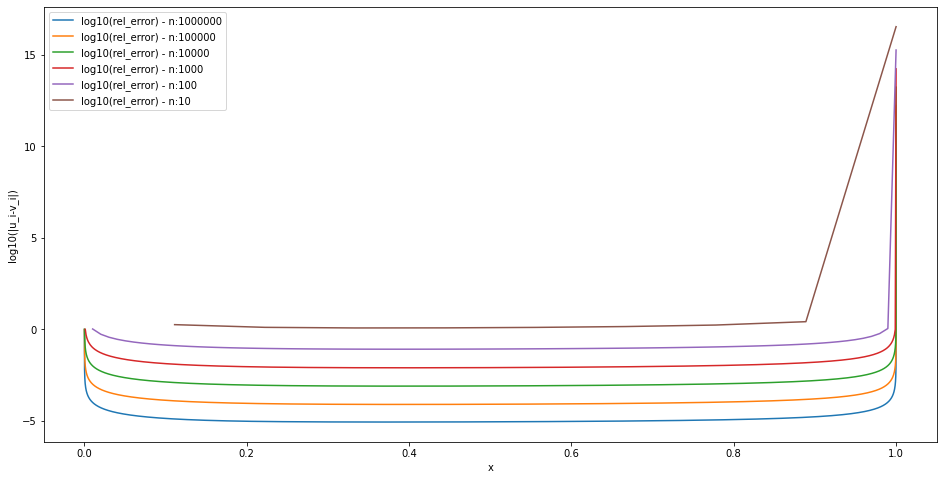

In [172]:
plt.figure(figsize=(16,8))
plt.xlabel('x')
plt.ylabel('log10(|u_i-v_i|)')
for file in glob.glob('Data/prob7*.csv'):
    df = pd.read_csv(file)
    df['u(x)'] = u(df['x'])
    df['rel_err'] = np.log10(np.absolute(
                                        (df['u(x)'] - df['v(x)']) / df['u(x)'] 
                                        ) 
                            ) 
    plt.plot(df['x'],df['rel_err'],label=f'log10(rel_error) - n:{df.shape[0]}')
plt.legend()
plt.savefig('Figures/problem8_rel_error.pdf')

In [173]:
max_list = []
df_list = []
for file in glob.glob('Data/prob7*.csv'):
    df = pd.read_csv(file)
    df['u(x)'] = u(df['x'])
    df['rel_err'] = (np.absolute(
                                        (df['u(x)'] - df['v(x)']) / df['u(x)'] 
                                        ) 
                            )
    max_ = df['rel_err'].max()
    ex_inf = df['rel_err'].loc[df['rel_err'] != np.inf].max()
    ex_inf_last = df['rel_err'].loc[df['rel_err'] != np.inf].loc[df['x'] != 1].max()
    max_list.append([max_,ex_inf,ex_inf_last])
    df_list.append(df)

In [184]:
df = pd.DataFrame(max_list,columns=['max','ex_inf','ex inf and x=1'],index=[df.shape[0] for df in df_list]).rename_axis('n')

df.to_csv('Data/problem8_table.csv')
df

,max,ex_inf,ex inf and x=1
n,,,
1000000,inf,1.697370e+11,1.000014
100000,inf,1.697475e+12,1.000120
10000,inf,1.698546e+13,1.001202
1000,inf,1.709293e+14,1.012051
100,inf,1.820743e+15,1.123939
10,inf,3.430457e+16,2.638876


## Problem 10 

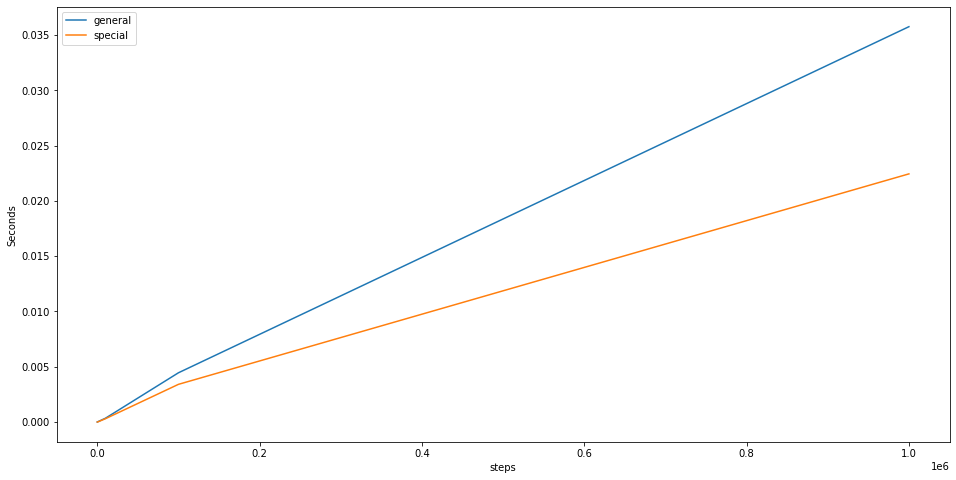

In [227]:
times_gen = pd.read_csv('Data/general_algo_times.csv',index_col=0)
times_spec = pd.read_csv('Data/special_algo_times.csv',index_col=0)

times_gen = times_gen.groupby(level=0).mean()
times_spec = times_spec.groupby(level=0).mean()

times = pd.concat([times_gen,times_spec],keys=['general','special'],axis=1)

times.droplevel(1,axis=1).plot(figsize=(16,8))
plt.ylabel('Seconds')
plt.savefig('Figures/problem10.pdf')